<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 5. Gravity
## Theoretical gravity and radius
---
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

Import libraries first ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## Theoretical gravity as a function of latitude

### Truncation $n \le 2$

$$
g_{theory}(r,\Theta) = \frac{G M}{r^2} 
         \left[ 1 + 
         \frac{3 a^2}{2 r^2} C_{20} (3 \sin^2\Theta-1)
         \right] 
- \omega^2 r \cos^2 \Theta
$$

The radius of the Earth also depends on latitude (no proof):
$$
r = a (1- f \sin^2\Theta)
$$

### International gravity formula ($n>2$)
$$
 g_0(\Theta) = g_e \left( 1 + \alpha \sin^2\Theta + \beta \sin^2 2\Theta \right)
$$

with (reference system from 1967):

- $g_e$    = 9.78031846m/s$^2$
- $\alpha$ = 0.0053024
- $\beta$  = -0.0000058


In [2]:
𝐺 = 6.67408e-11
M = 5.972e24
a = 6378160.
r = 6371000.
f = 1./298.275
mbar = 3.46775e-3
c20 = (2*f-mbar) / 3.
print(c20)
print(G*M/a**2)
d2r = np.pi/180.
omega = 7292115e-11

theta = np.linspace(-90,90,101)
rtheory = a*(1.-f*np.sin((theta)*d2r)**2)
gtheory = G*M/r**2 * (1.+c20*3*a**2/2/r**2*(3*np.sin((theta)*d2r)**2-1.)) - omega**2*r*np.cos((theta)*d2r)**2
g0      = 9.780318*(1.+0.0053024*(np.sin(theta*d2r))**2-0.0000058*(np.sin(2*theta*d2r))**2)

0.0010791572304640572
9.797615411672318


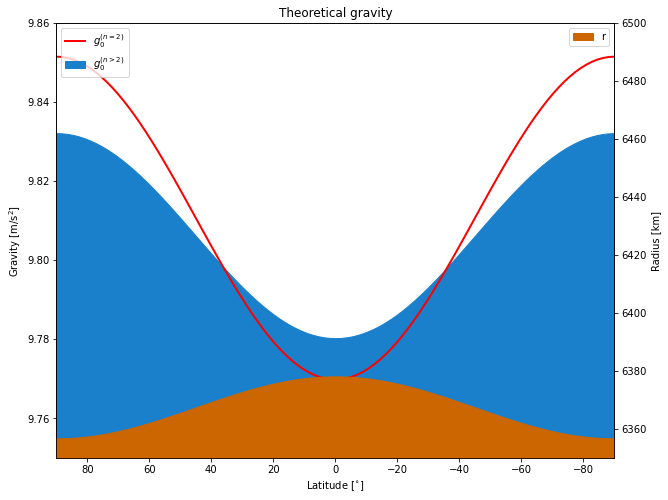

In [3]:
fig,axs0 = plt.subplots(1,1,figsize=(10,8))

axs0.set_title('Theoretical gravity')
axs0.set_xlim([90,-90])
axs0.set_ylim([9.75,9.86])
axs0.set_xlabel('Latitude [$^{\\circ}$]')
axs0.set_ylabel('Gravity [m/s$^2$]')
axs0.fill_between(theta,g0,9.75,color=(0.1,0.5,0.8),label='$g_0^{(n>2)}$')
axs0.plot(theta,gtheory,linewidth=2,color='red',label='$g_0^{(n=2)}$')
axs0.legend(loc='upper left')

axs1 = axs0.twinx()
axs1.set_xlim([90,-90])
axs1.set_ylim([6350,6500])
axs1.set_ylabel('Radius [km]')
axs1.fill_between(theta,rtheory/1000,6350.,color=(0.8,0.4,0.0),label='r')
axs1.legend(loc='upper right')

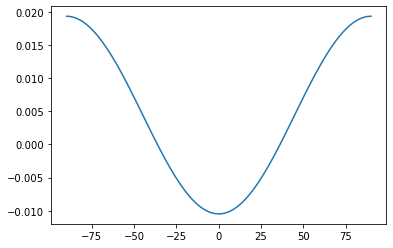

In [4]:
plt.plot(theta,gtheory-g0)

... done